**CIND 820 - Capstone Project**

In this project, I have worked on heart failure clinical record dataset to analyse and predict survival from heart failure.

For this study, we shall use famous Python packages to do basic data analysis. This includes Pandas, Numpy, Matplotlib, Sklearn, Seaborn and Pandas profiling package.

In [174]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip3 install matplotlib
!pip3 install graphviz

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Importing dependencies

In [175]:
import pandas as pd #for dataframe related function use; tool for handling real-world messy data
import numpy as np #for calculating data, helps working with array data
from sklearn import preprocessing #for statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

Importing the models

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc

The CSV data set file is uploaded by running the following code snippet.

In [177]:
data_file="heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(data_file)

In [178]:
# Let's display first 10 records 
df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [179]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [180]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

# Model Evaluation
### Testing the following different machine learning algorithms on the dataset

- Logistic Regression
- Support Vector Classifier
- K-Nearest Neighbors
- Random Forest
- Decision Tree
- Naive Bayes

# **Train Test Split**

In [181]:
# Splitting dataset into training set and test set
# Our class column is DEATH_EVENT here and everything else will be used as features 
class_col_name='DEATH_EVENT' 

X=df.drop(columns = "DEATH_EVENT", axis = 1)
y = df[class_col_name]
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state= 3) 

In [182]:
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (239, 12) (60, 12)


Comparing the performance of the models by creating a function

In [183]:
#list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel = 'linear'), KNeighborsClassifier(), 
          RandomForestClassifier(), DecisionTreeClassifier(), MultinomialNB()]

In [184]:
def compare_models_train_test():
    for model in models:
        
        #training the model
        model.fit(X_train, y_train)
        
        #eevaluating the model
        test_data_prediction = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, test_data_prediction)
        print('Accuracy score of the ', model, ' = ', accuracy)

Result of Accuracy score for the different models:

In [185]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.8833333333333333
Accuracy score of the  SVC(kernel='linear')  =  0.8166666666666667
Accuracy score of the  KNeighborsClassifier()  =  0.6833333333333333
Accuracy score of the  RandomForestClassifier()  =  0.9166666666666666
Accuracy score of the  DecisionTreeClassifier()  =  0.8666666666666667
Accuracy score of the  MultinomialNB()  =  0.6166666666666667


# **Cross Validation**

Cross validation is conducted on the following classifiers:
- Logistic Regression
- Support Vector Classifier
- K-Nearest Neighbors
- Random Forest
- Decision Tree
- Naive Bayes

A function is created to compare the models:

In [188]:
def compare_models_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, X, y, cv = 5)
        
        mean_accuracy = sum(cv_score)/len(cv_score)
        
        mean_accuracy = mean_accuracy * 100
        
        mean_accuracy = round(mean_accuracy, 2)
        
        print('Cross Validation accuracies for the ', model, '= ', cv_score)
        print('Accuracy % of the ', model, mean_accuracy)
        print('--------------------------------------------')

Result of running the cross validation function:

In [189]:
compare_models_cross_validation()

Cross Validation accuracies for the  LogisticRegression(max_iter=1000) =  [0.56666667 0.88333333 0.9        0.88333333 0.6779661 ]
Accuracy % of the  LogisticRegression(max_iter=1000) 78.23
--------------------------------------------
Cross Validation accuracies for the  SVC(kernel='linear') =  [0.33333333 0.93333333 0.76666667 0.78333333 0.6779661 ]
Accuracy % of the  SVC(kernel='linear') 69.89
--------------------------------------------
Cross Validation accuracies for the  KNeighborsClassifier() =  [0.6        0.55       0.61666667 0.68333333 0.6440678 ]
Accuracy % of the  KNeighborsClassifier() 61.88
--------------------------------------------
Cross Validation accuracies for the  RandomForestClassifier() =  [0.48333333 0.8        0.85       0.7        0.69491525]
Accuracy % of the  RandomForestClassifier() 70.56
--------------------------------------------
Cross Validation accuracies for the  DecisionTreeClassifier() =  [0.36666667 0.88333333 0.7        0.6        0.6440678 ]
Accu

# **Plotting ROC Curves for the classifiers**

In [190]:
#A function is created to plot the curves for all the models:
def plot_roc(y_test,xtest):
    for model in models:
        if hasattr(model,'decision_function'):
            probs=model.decision_function(xtest) 
        elif hasattr(model,'predict_proba'):
            probs=model.predict_proba(xtest) [:,1]
        fpr,tpr,threshold=roc_curve(y_test,probs)
        roc_auc=auc(fpr,tpr)
        print('Model Name: ', model)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'b--')
        plt.xlim([0,1])
        plt.ylim([0,1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()

Model Name:  LogisticRegression(max_iter=1000)
ROC AUC=0.94


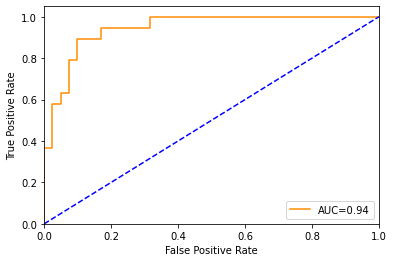

Model Name:  SVC(kernel='linear')
ROC AUC=0.89


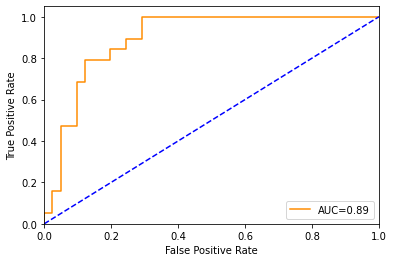

Model Name:  KNeighborsClassifier()
ROC AUC=0.51


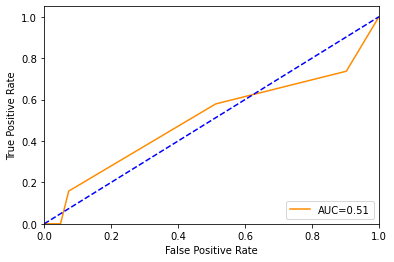

Model Name:  RandomForestClassifier()
ROC AUC=0.96


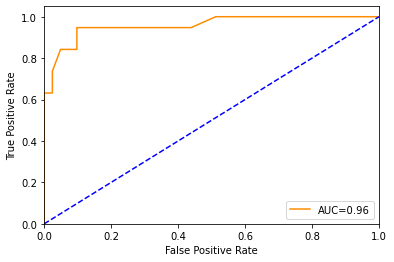

Model Name:  DecisionTreeClassifier()
ROC AUC=0.85


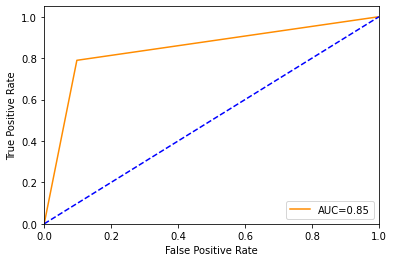

Model Name:  MultinomialNB()
ROC AUC=0.65


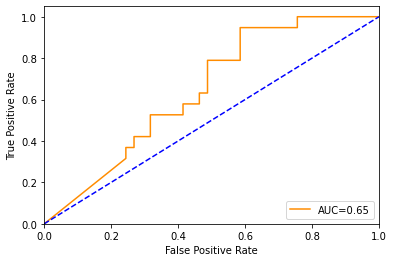

In [191]:
plot_roc(y_test, X_test)

# Feature Selection and Ranking

In [192]:
from sklearn.feature_selection import RFE, SelectFromModel

In [193]:
# Without feature selection check auuracy with Random forest
rf_w = RandomForestClassifier (random_state = 3)
rf_w.fit(X_train, y_train)
y_pred_rf_w = rf_w.predict(X_test)
metrics.accuracy_score(y_test, y_pred_rf_w)

0.9166666666666666

Finding feature ranking

<AxesSubplot:xlabel='Features', ylabel='Importances'>

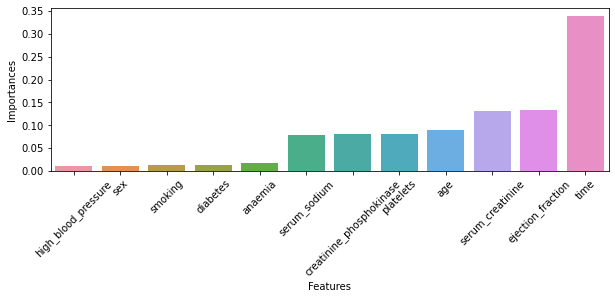

In [194]:
# finding importance of the resulting features
importances = rf_w.feature_importances_

# creating a data frame for visualization
final_df = pd.DataFrame({"Features": X_train.columns, "Importances": importances})
final_df.set_index("Importances")

# sorting in ascending order for better visualization
final_df = final_df.sort_values("Importances")

# barplot of the feature importances
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features", y="Importances", data = final_df)

In [195]:
# With feature selection check accuracy with Random Forest
# The following example shows how to retrieve the 7 most informative features
model_tree = RandomForestClassifier(n_estimators=100,random_state=3)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=7, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)
#Reduce X to the selected features and then predict using the predict
y_pred_rf = sel_rfe_tree.predict(X_test)
metrics.accuracy_score(y_test,y_pred_rf)

[ True False  True False  True False  True  True  True False False  True]
[1 2 1 4 1 6 1 1 1 5 3 1]


0.8833333333333333

The features which were selected are ranked 1. Selecting 7 of the most important features will give a lower accuracy than selecting all 12 features. Thus reducing the features will not improve the prediction.

In [196]:
# find the number of selected features with the help of the following script:
selected_cols = [column for column in X_train.columns if column in X_train.columns[sel_rfe_tree.get_support()]]
selected_cols

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

# **Appendix**

**Exploratory Analysis**

We have just done basic exploratory data analysis in the beginning using info function, describe function,and head function of Pandas. A very good Python pacakge that performs variety of the basic analysis by itself and generates a report is shown below. Mising values, dupicate values, correlation, etc. can be analyzed from here.

In [197]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [198]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]